# Analyze Multiple Time Series 

This template provides a playbook to analyze multiple time series simultaneously. You will take an indepth look into your time series data by:

1. Loading and visualizing your data
2. Inspecting the distribution 
3. Analyzing subsets of your data
4. Decomposing time series into seasonality, trend and noise
5. Visualizing correlations with a clustermap 

In [4]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns


## 1. Load and visualize your data


In [3]:
# Upload your data as CSV and load as a data frame
df = pd.read_csv(
    "data.csv",
    parse_dates=["datestamp"],  # Tell pandas which column(s) to parse as dates
    index_col="datestamp",  # Use a date column as your index
)
df.head()


,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


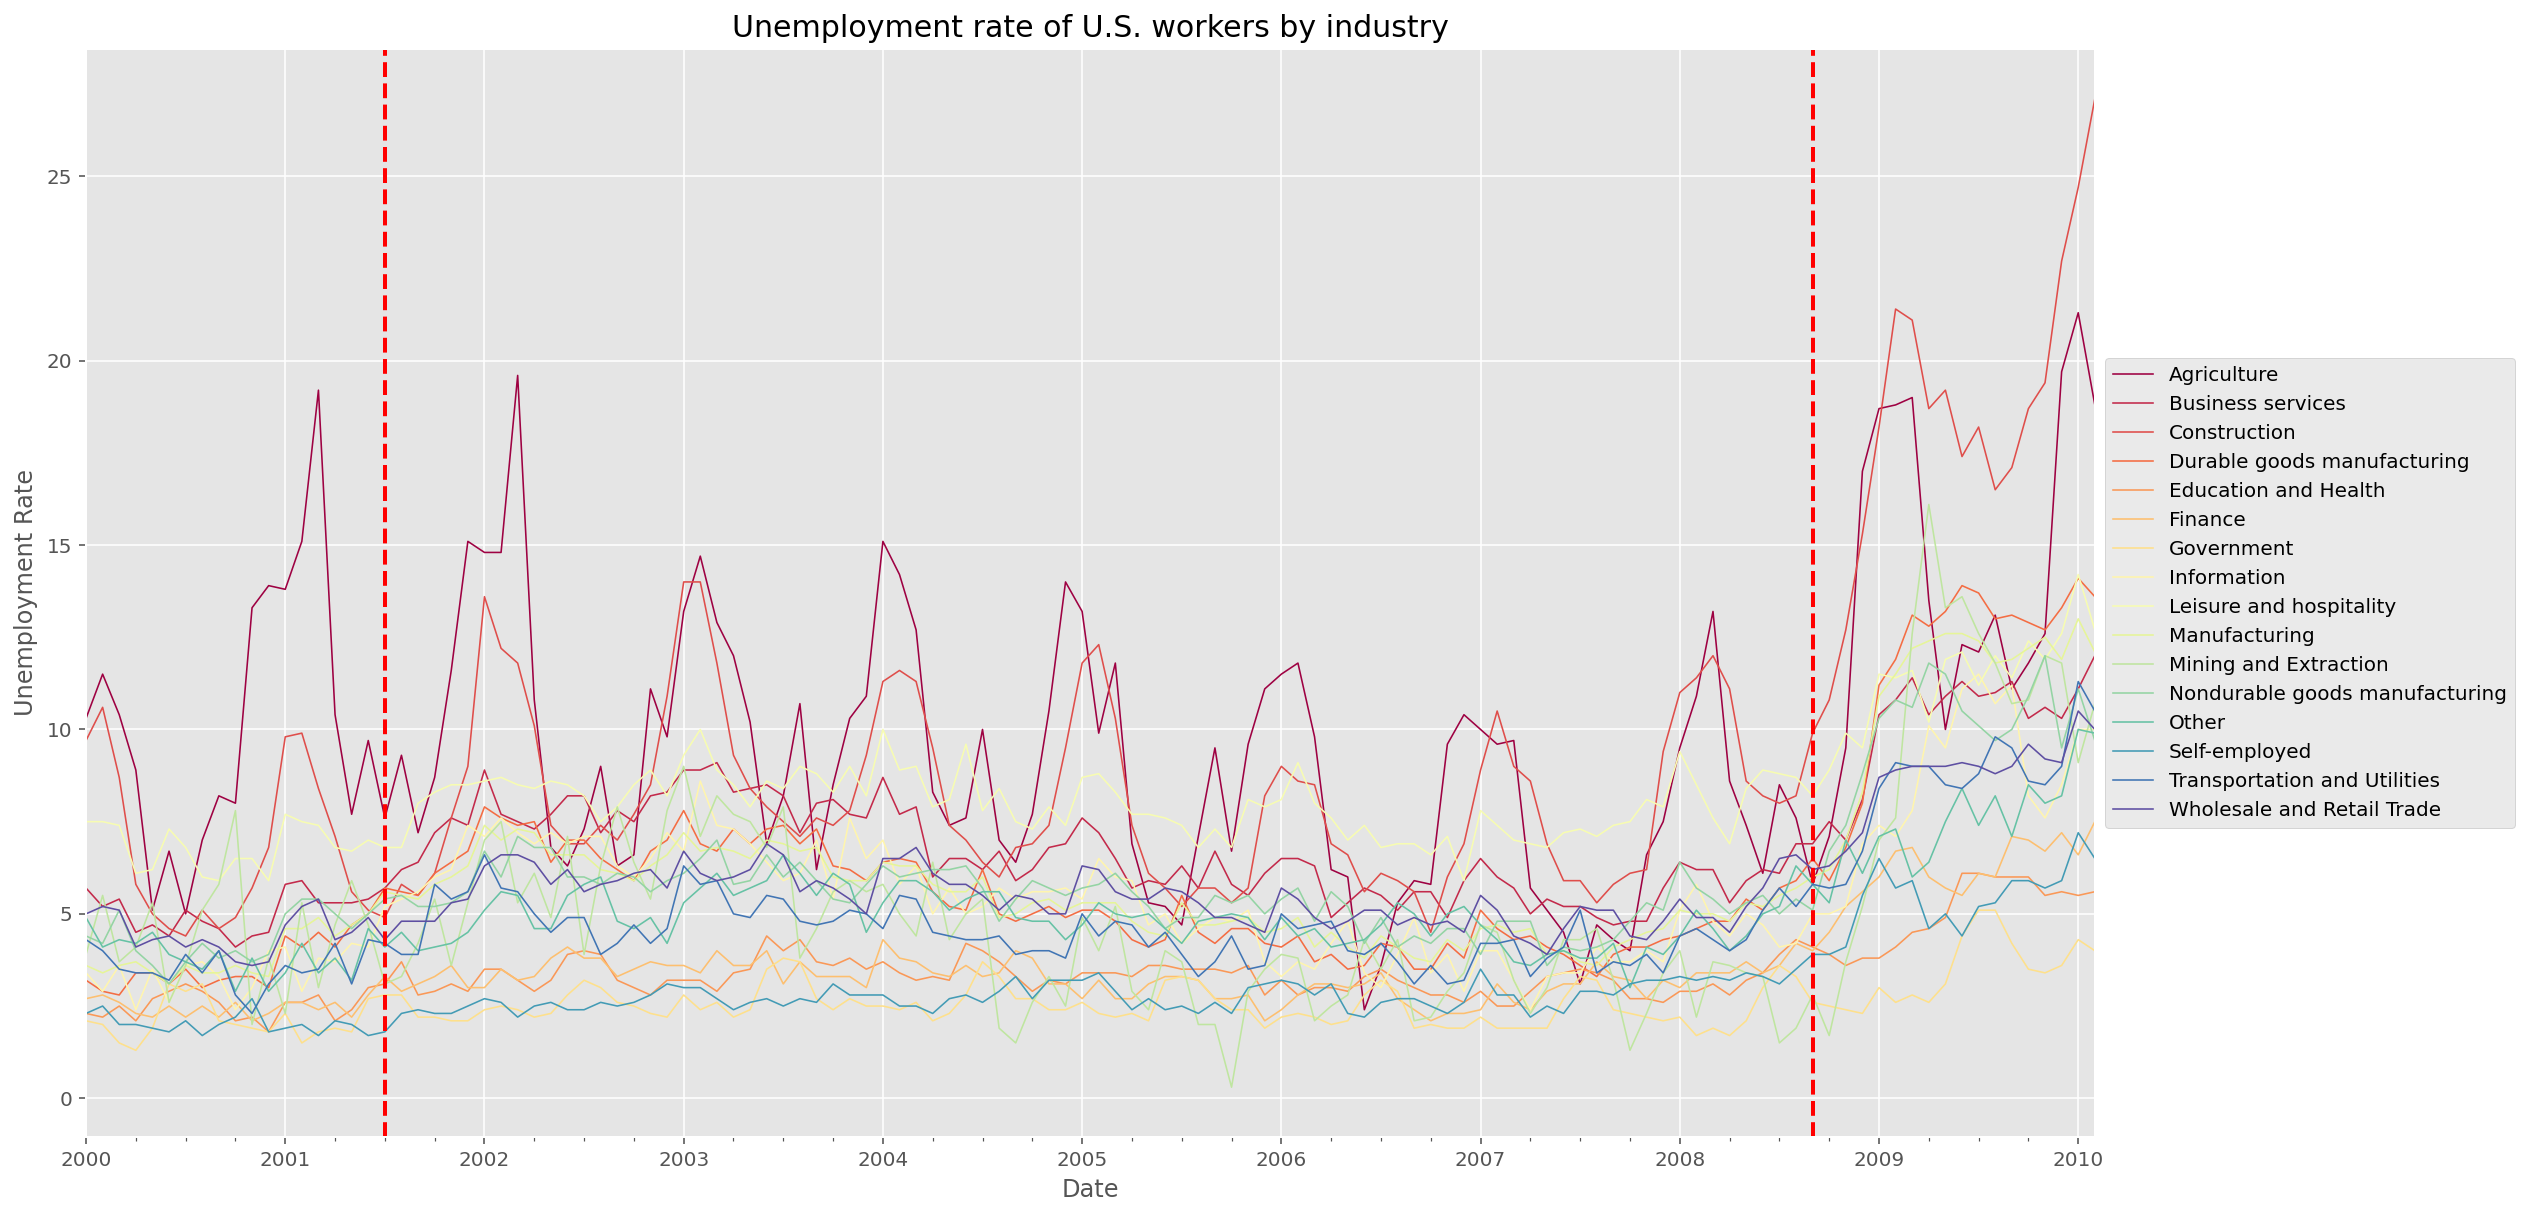

In [6]:
# Plot settings
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (18, 10)
plt.style.use('ggplot')

# Plot all time series in the df DataFrame
ax = df.plot(
    colormap="Spectral",  # Set a colormap to avoid overlapping colors
    fontsize=10,  # Set fontsize
    linewidth=0.8, # Set width of lines
)

# Set labels and legend
ax.set_xlabel("Date", fontsize=12)  # X axis text
ax.set_ylabel("Unemployment Rate", fontsize=12) # Set font size
ax.set_title("Unemployment rate of U.S. workers by industry", fontsize=15)
ax.legend(
    loc="center left",  # Set location of legend within bounding box
    bbox_to_anchor=(1.0, 0.5),  # Set location of bounding box
)

# Annotate your plots with vertical lines
ax.axvline(
    "2001-07-01",  # Position of vertical line
    color="red",  # Color of line
    linestyle="--",  # Style of line
    linewidth=2, # Thickness of line
)
ax.axvline("2008-09-01", color="red", linestyle="--", linewidth=2)

# Show plot
plt.show()


## 2. Inspect the distribution

In [7]:
df.describe()


,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


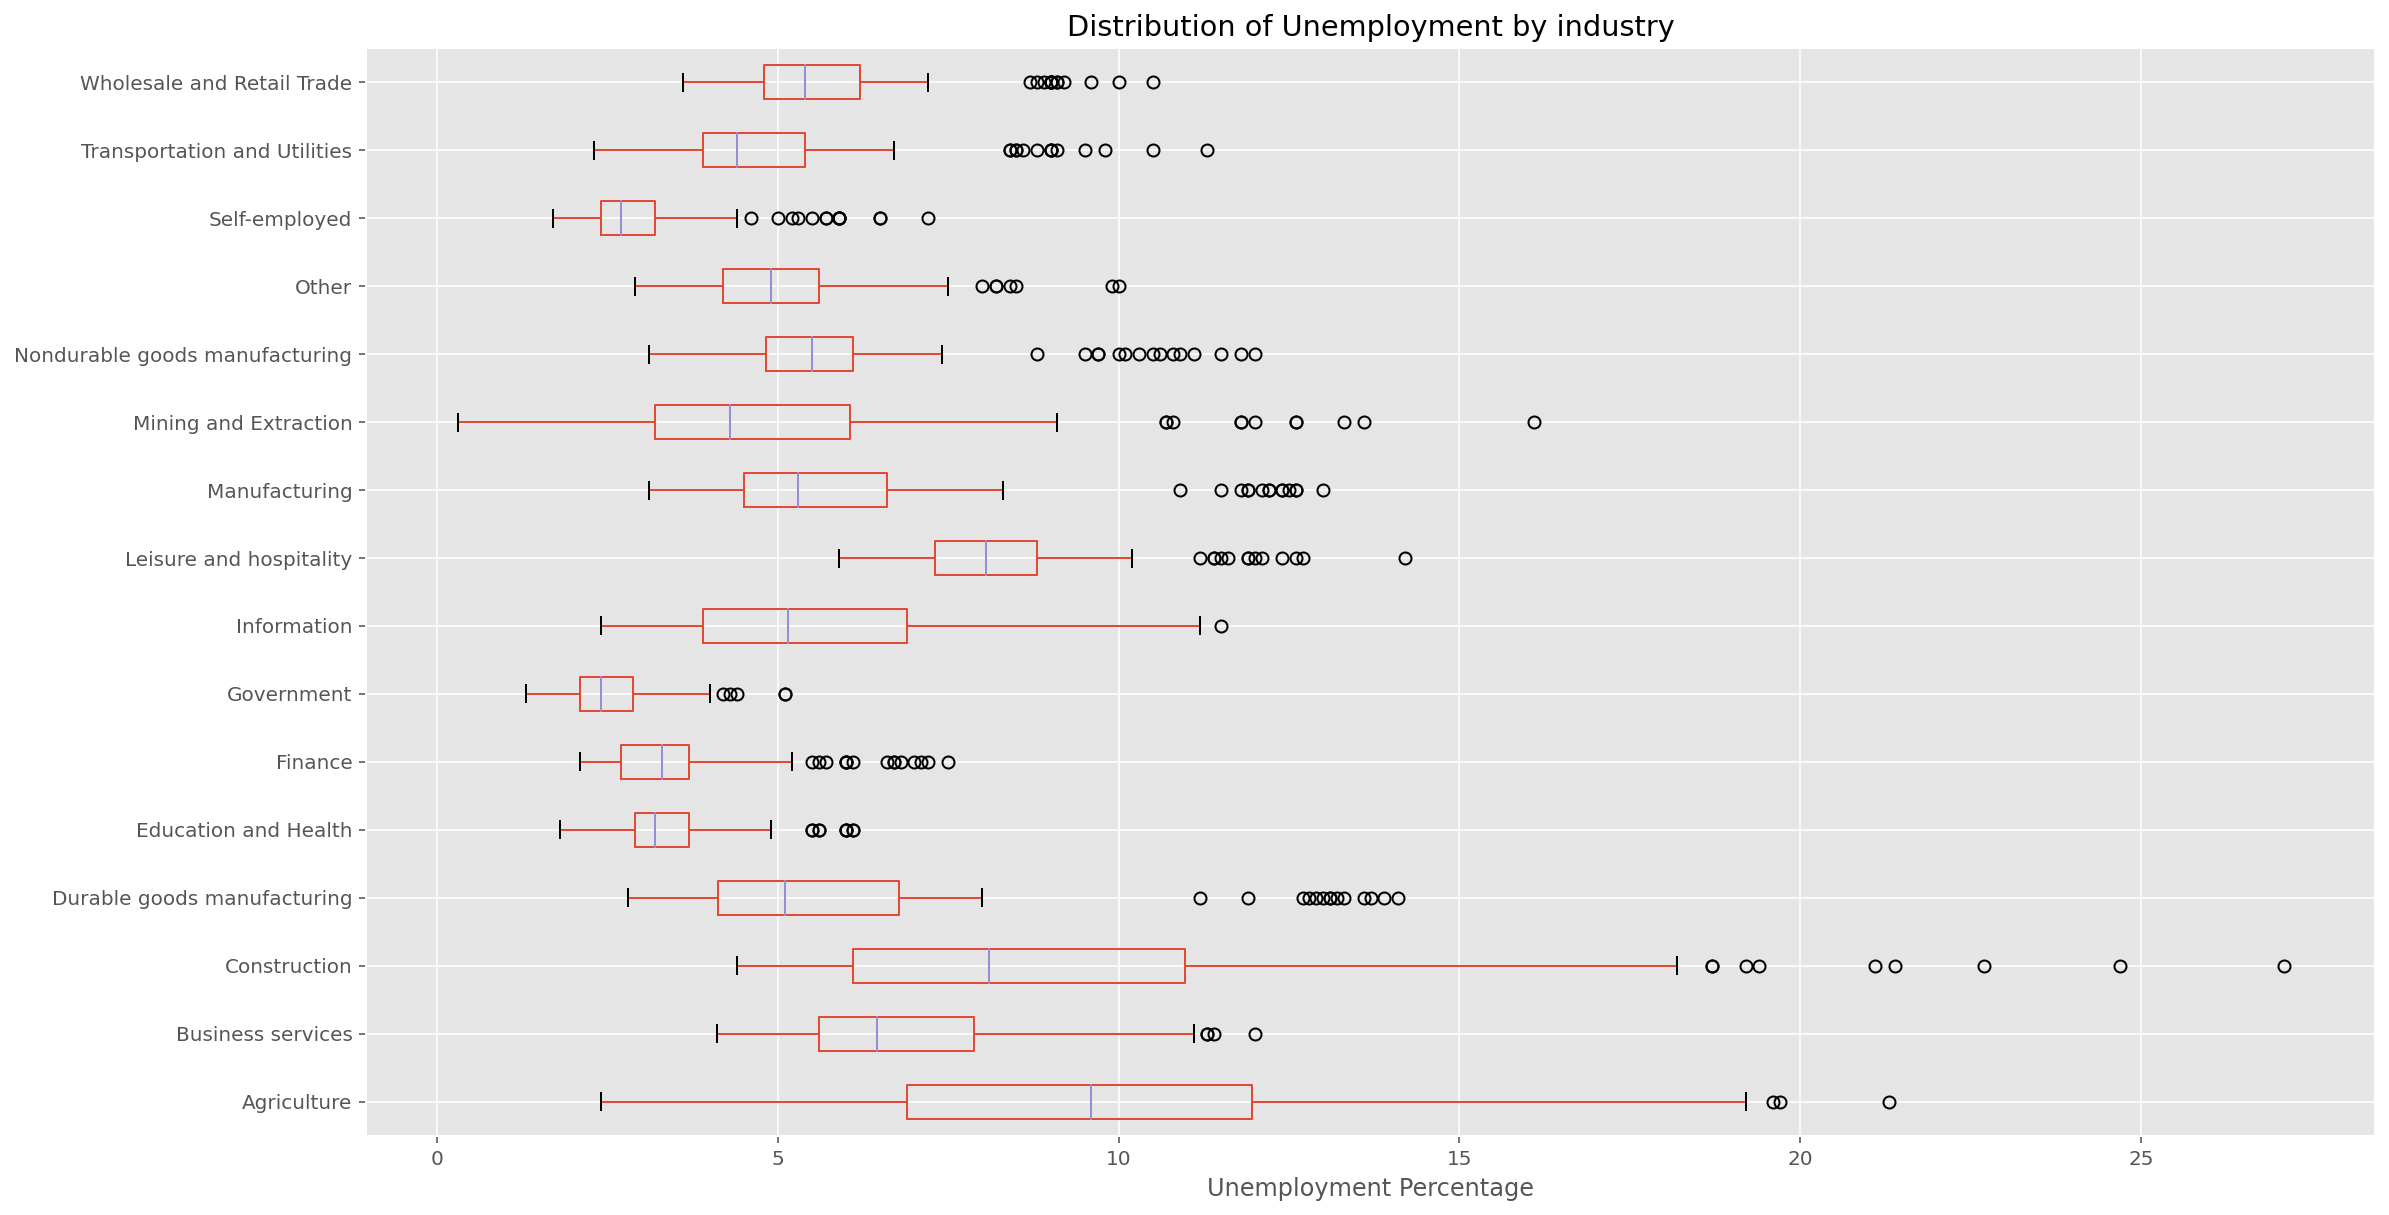

In [8]:
# Generate a boxplot
ax = df.boxplot(fontsize=10, vert=False)  # Plots boxplot horizonally if false
ax.set_xlabel("Unemployment Percentage")
ax.set_title("Distribution of Unemployment by industry")
plt.show()


## 3. Analyze subsets of your data

### a) Visualize (partial) autocorrelation 
Autocorrelation refers to the degree of correlation of a variable between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series.

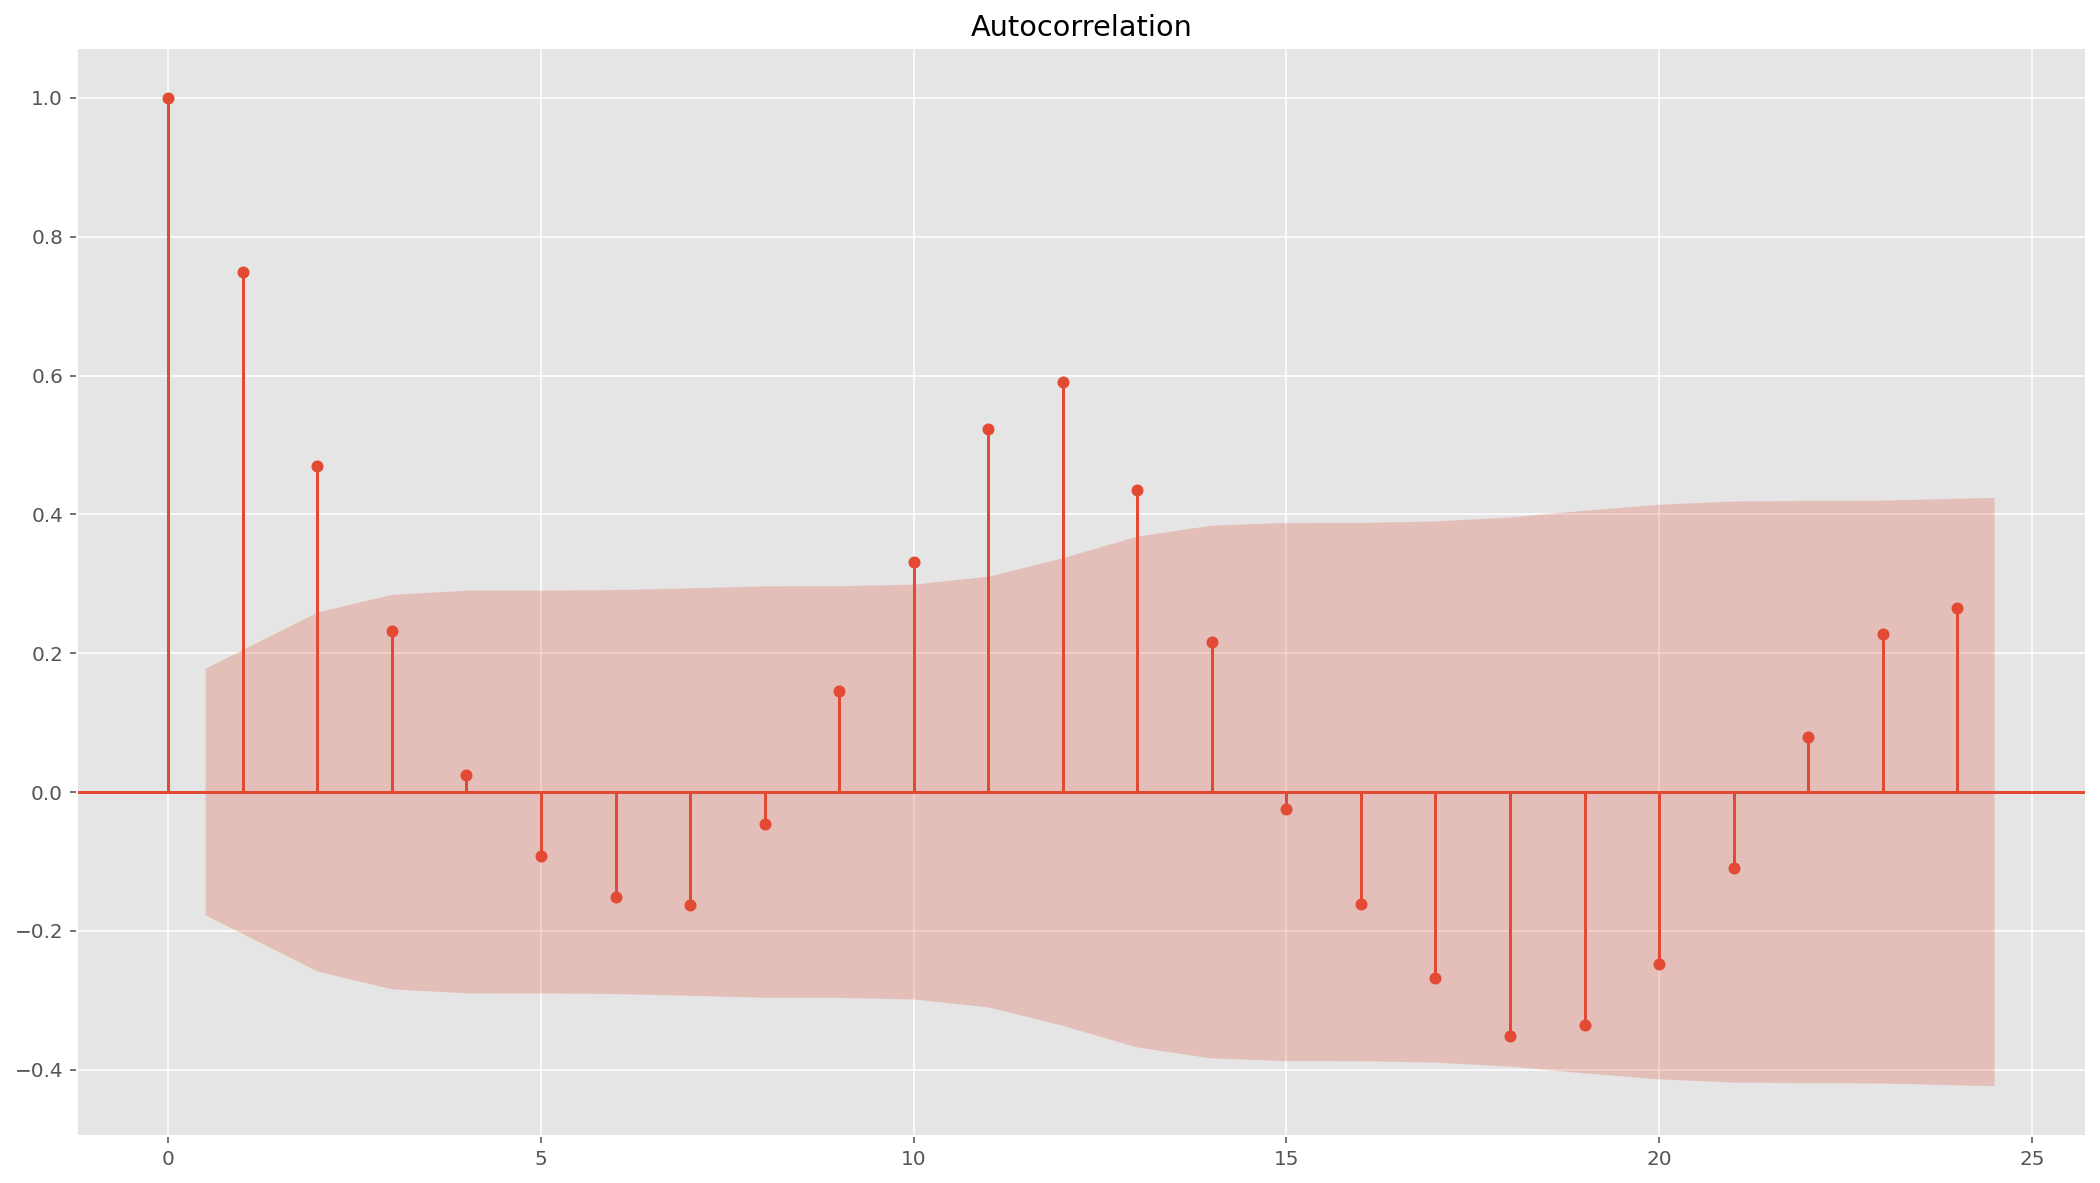

In [9]:
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(
    df["Agriculture"], lags=24  # Change column to inspect
)  # Set lag period

# Show plot
plt.show()


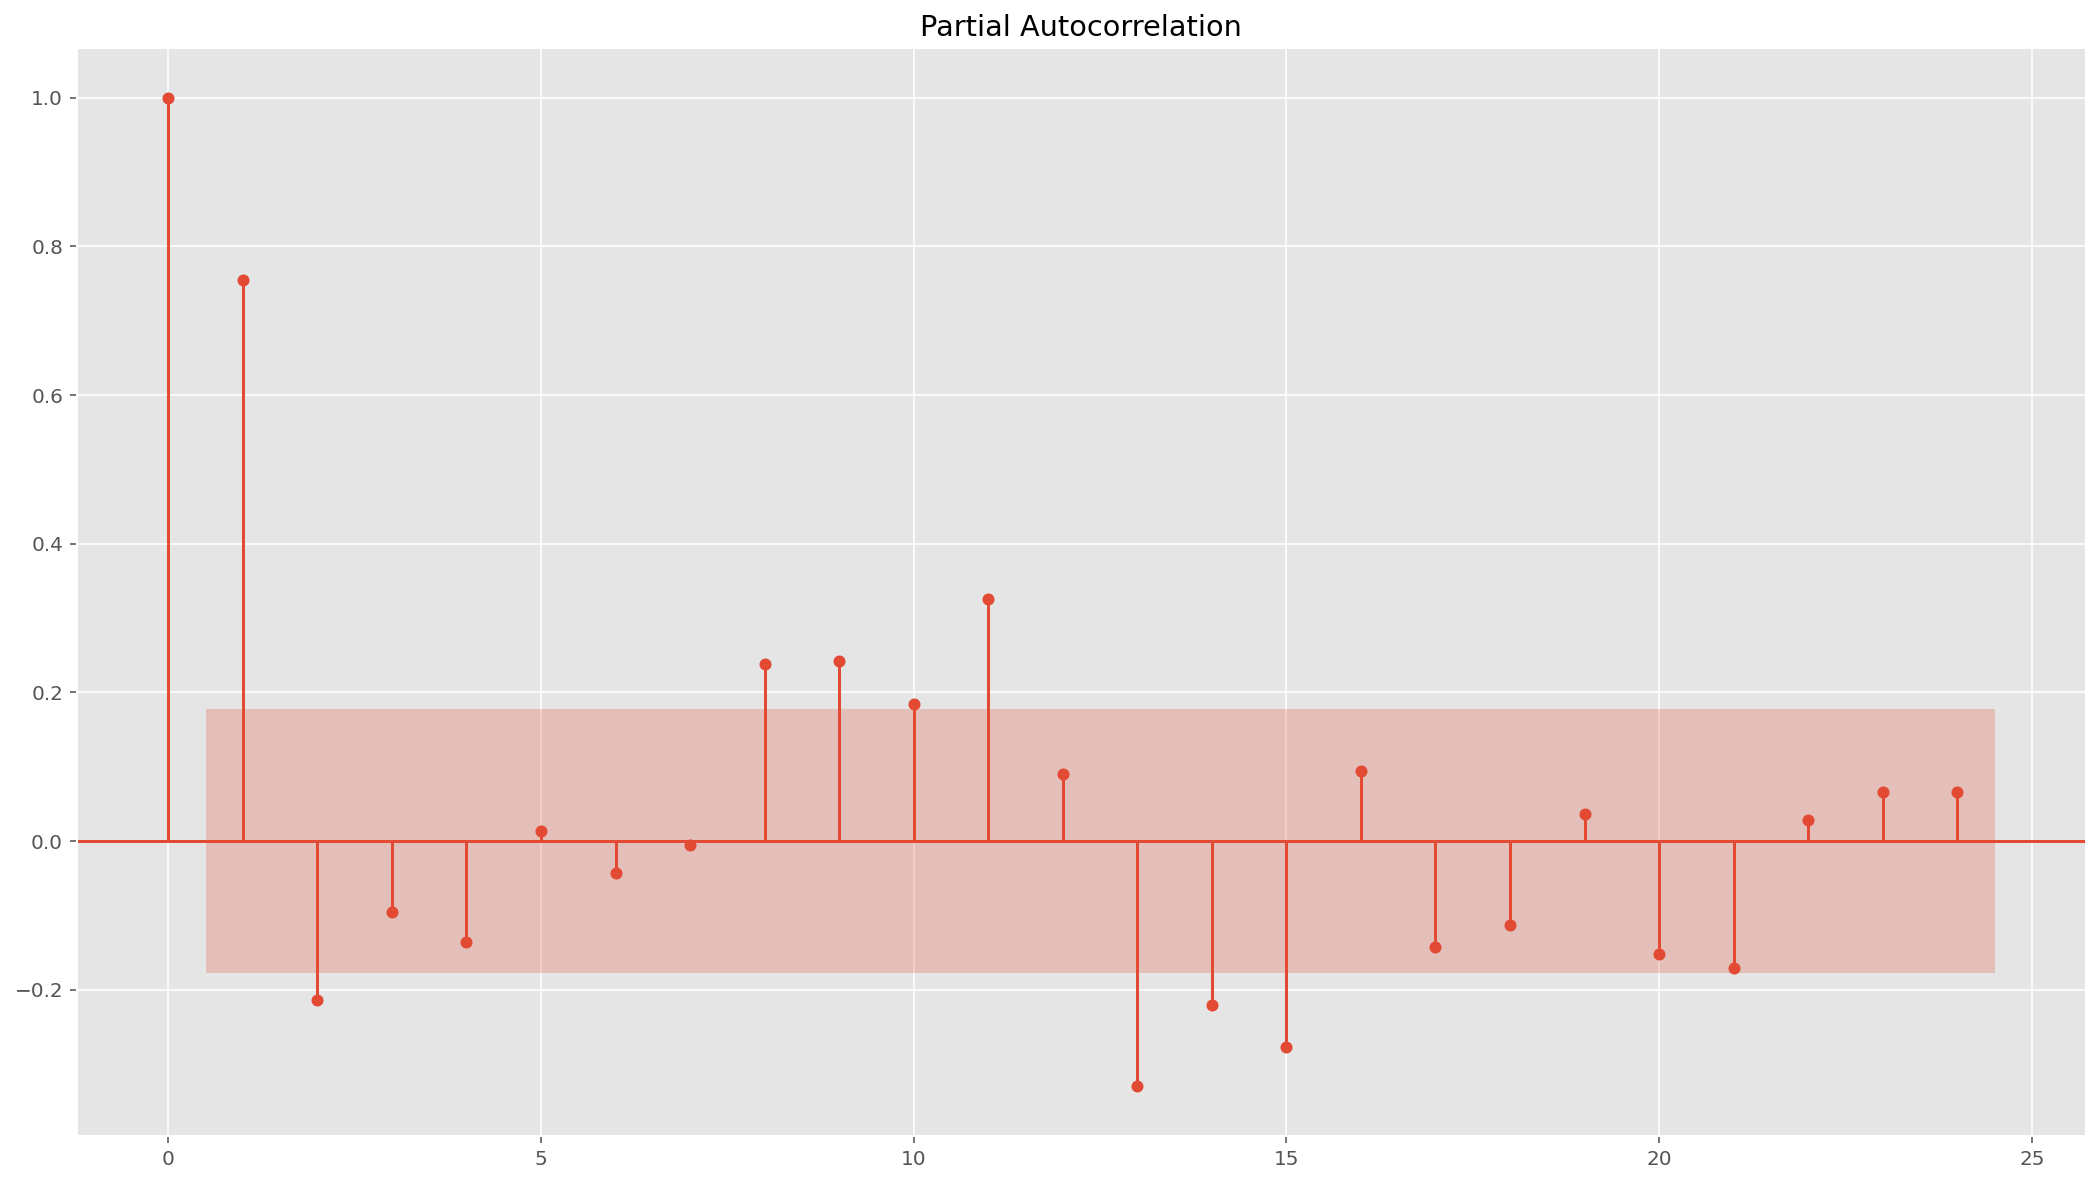

In [10]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(
    df["Agriculture"], lags=24  # Change column to inspect
)  # Set lag period

# Show plot
plt.show()


### b) Group data by different time periods
Uncover patterns by grouping your data by different time periods e.g. yearly, monthly, daily etc.

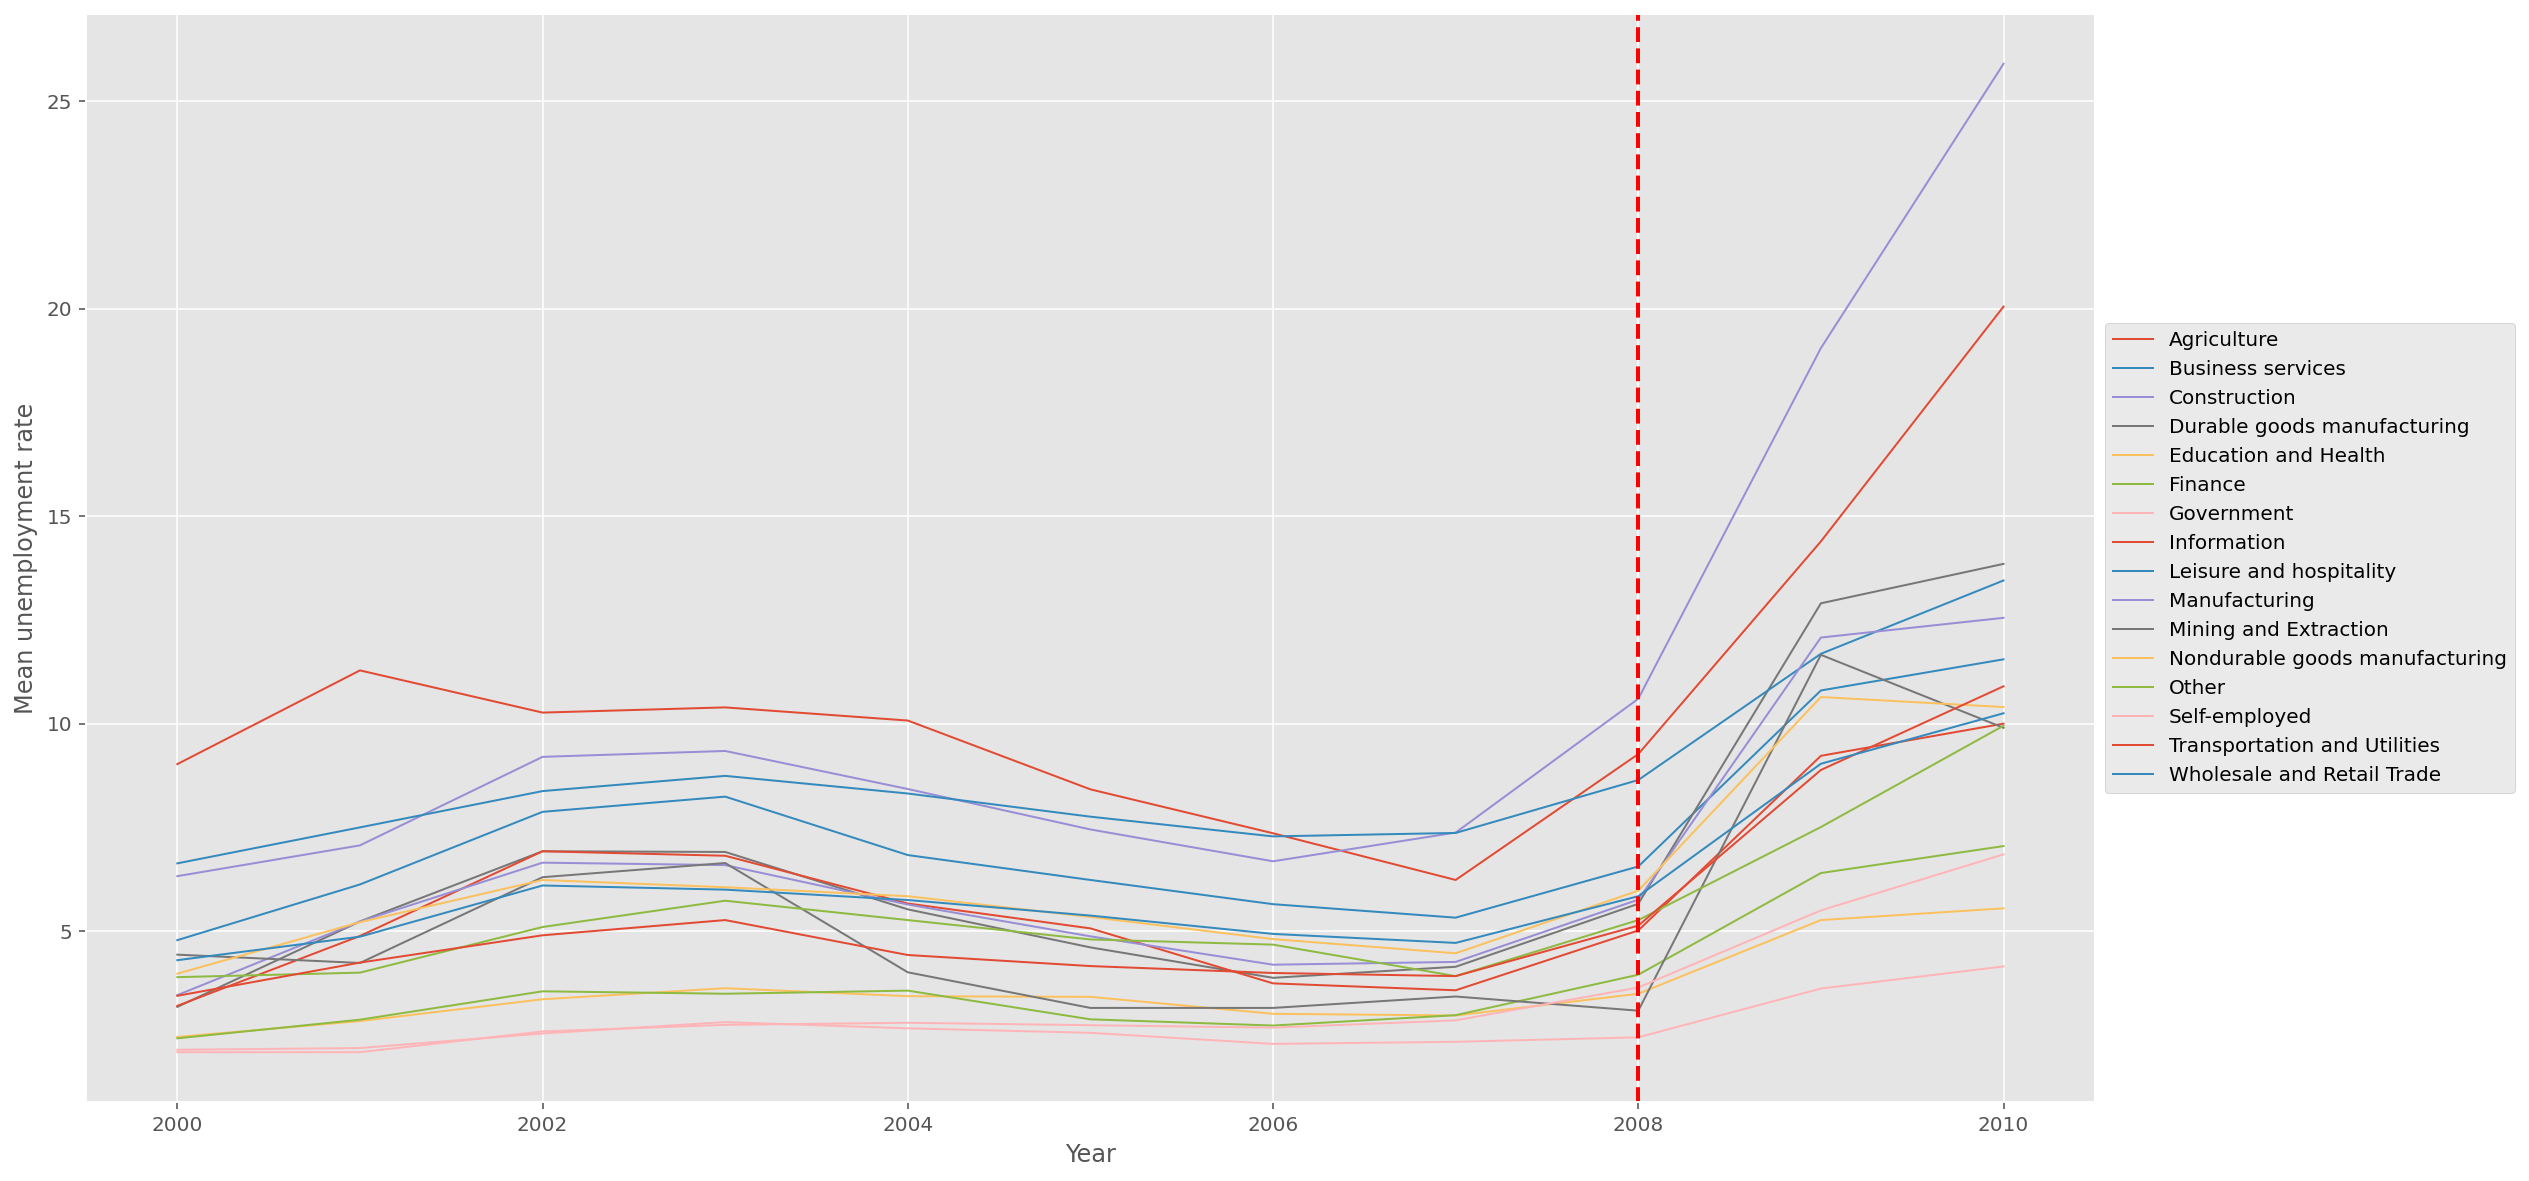

In [11]:
# Extract time period of interest
index_year = df.index.year  # Choose year, month, day etc.

# Compute mean for each time period
df_by_year = df.groupby(index_year).mean()  # Replace .mean() with aggregation function

# Plot the mean for each time period
ax = df_by_year.plot(fontsize=10, linewidth=1)

# Set axis labels and legend
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Mean unemployment rate", fontsize=12)
ax.axvline(
    2008,  # Position of vertical line
    color="red",  # Color of line
    linestyle="--",  # Style of line
    linewidth=2,
)  # Thickness of line

ax.legend(
    loc="center left", bbox_to_anchor=(1.0, 0.5)  # Placement of legend within bbox
)  # Location of boundary box (bbox)
plt.show()


## 4. Decompose time series into seasonality, trend and noise
Seasonality, trend and noise are essential to every time series. You can interpret them as such:
- **Trend** shows you the increasing or decreasing value in the series. 
- **Seasonality** highlights the repeating short-term cycle in the series. 
- **Noise** is the random variation in the series.

In [12]:
# Run time series decomposition on each time series of the DataFrame
df_names = df.columns
df_decomp = {ts: sm.tsa.seasonal_decompose(df[ts]) for ts in df.columns}

# Capture the seasonal, trend and noise components for the decomposition of each time series
seasonal_dict = {ts: df_decomp[ts].seasonal for ts in df_names}
trend_dict = {ts: df_decomp[ts].trend for ts in df_names}
noise_dict = {ts: df_decomp[ts].resid for ts in df_names}

# Create a DataFrame from the dictionaries
seasonality_df = pd.DataFrame.from_dict(seasonal_dict)
trend_df = pd.DataFrame.from_dict(trend_dict)
noise_df = pd.DataFrame.from_dict(noise_dict)

# Remove the label for the index
seasonality_df.index.name = None
trend_df.index.name = None
noise_df.index.name = None


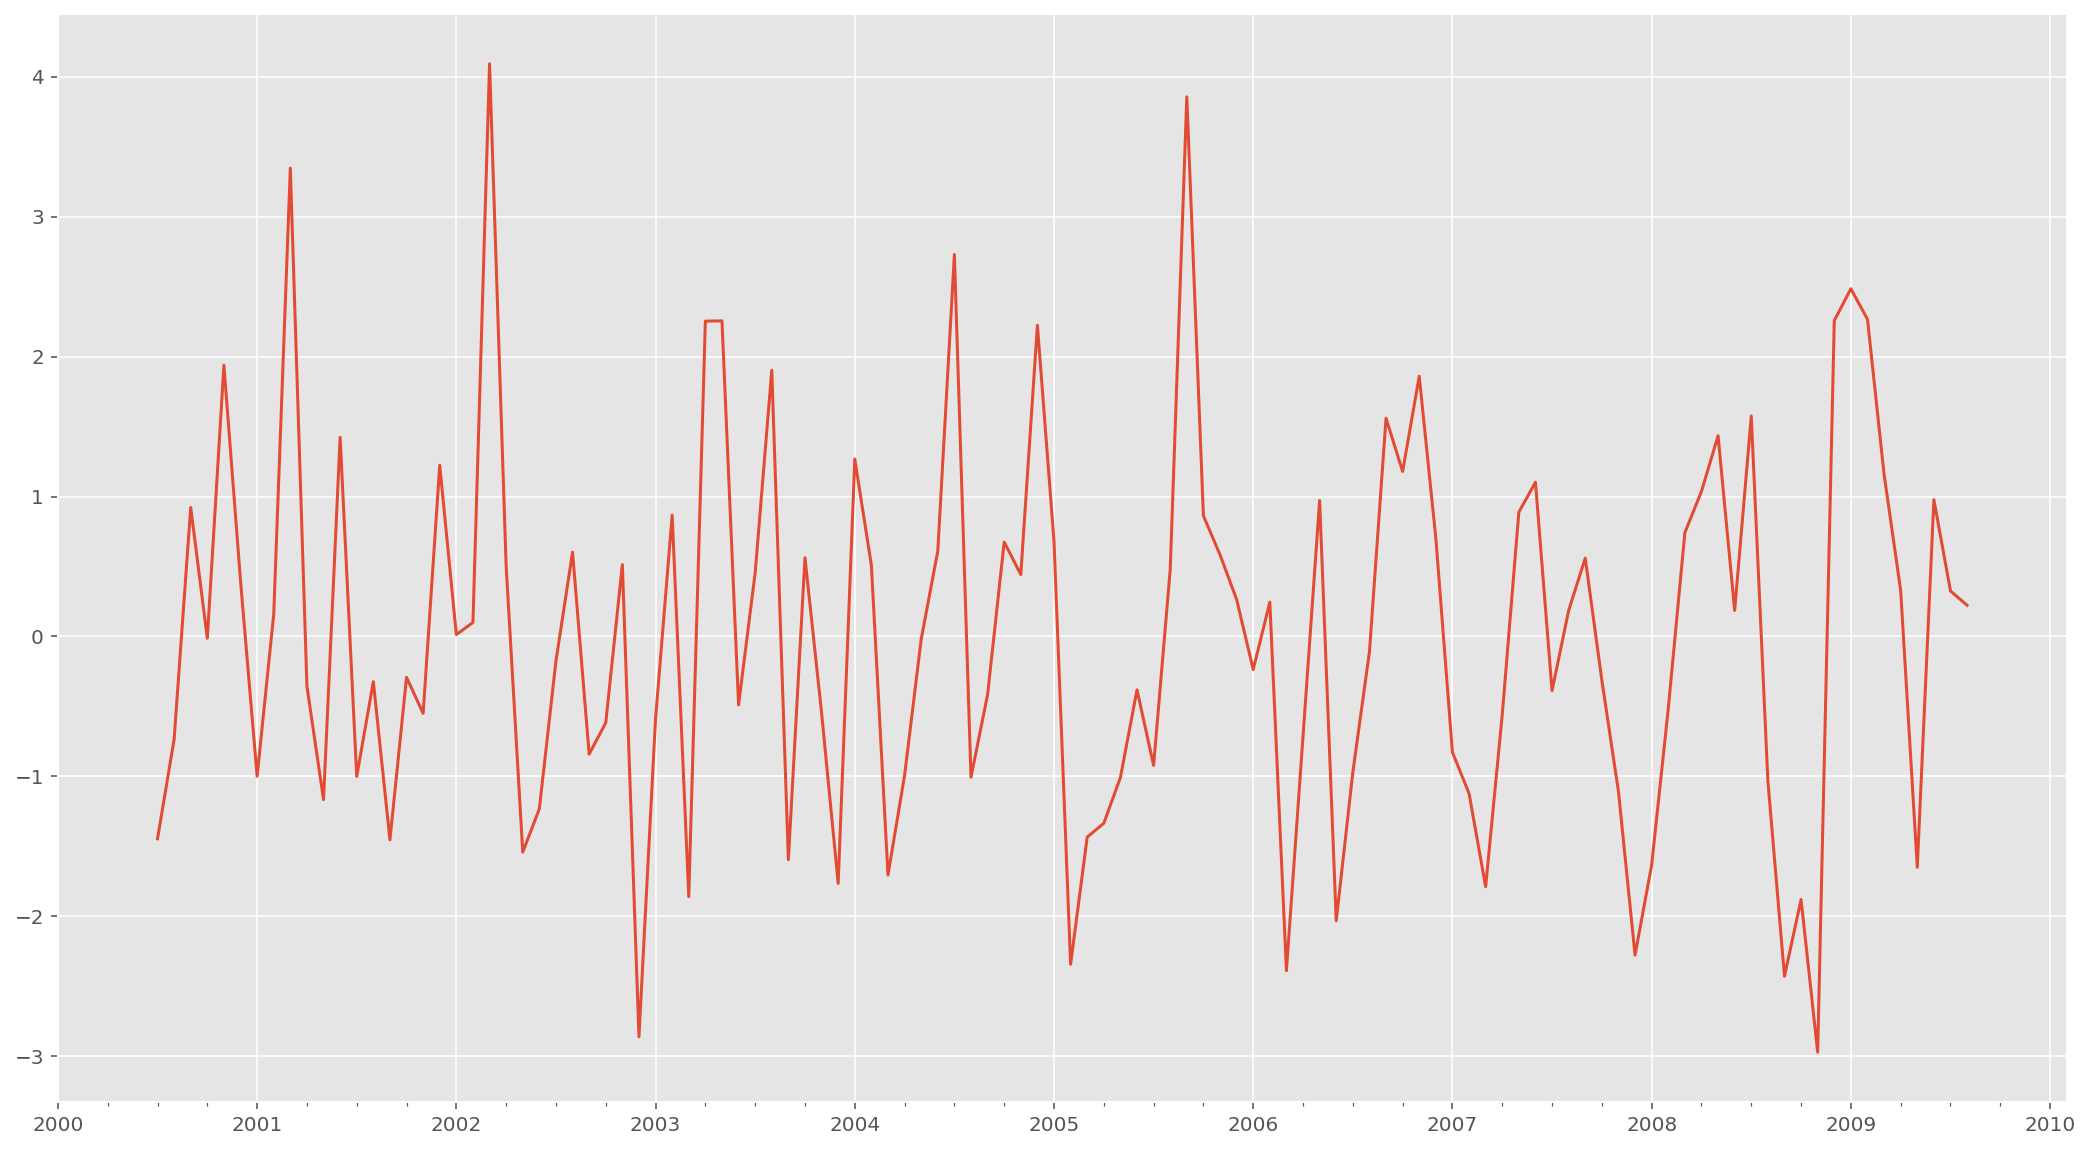

In [14]:
# Look at individual seasonality, trend or noise
noise_df["Agriculture"].plot()
# Change the dataframe and colum to explore


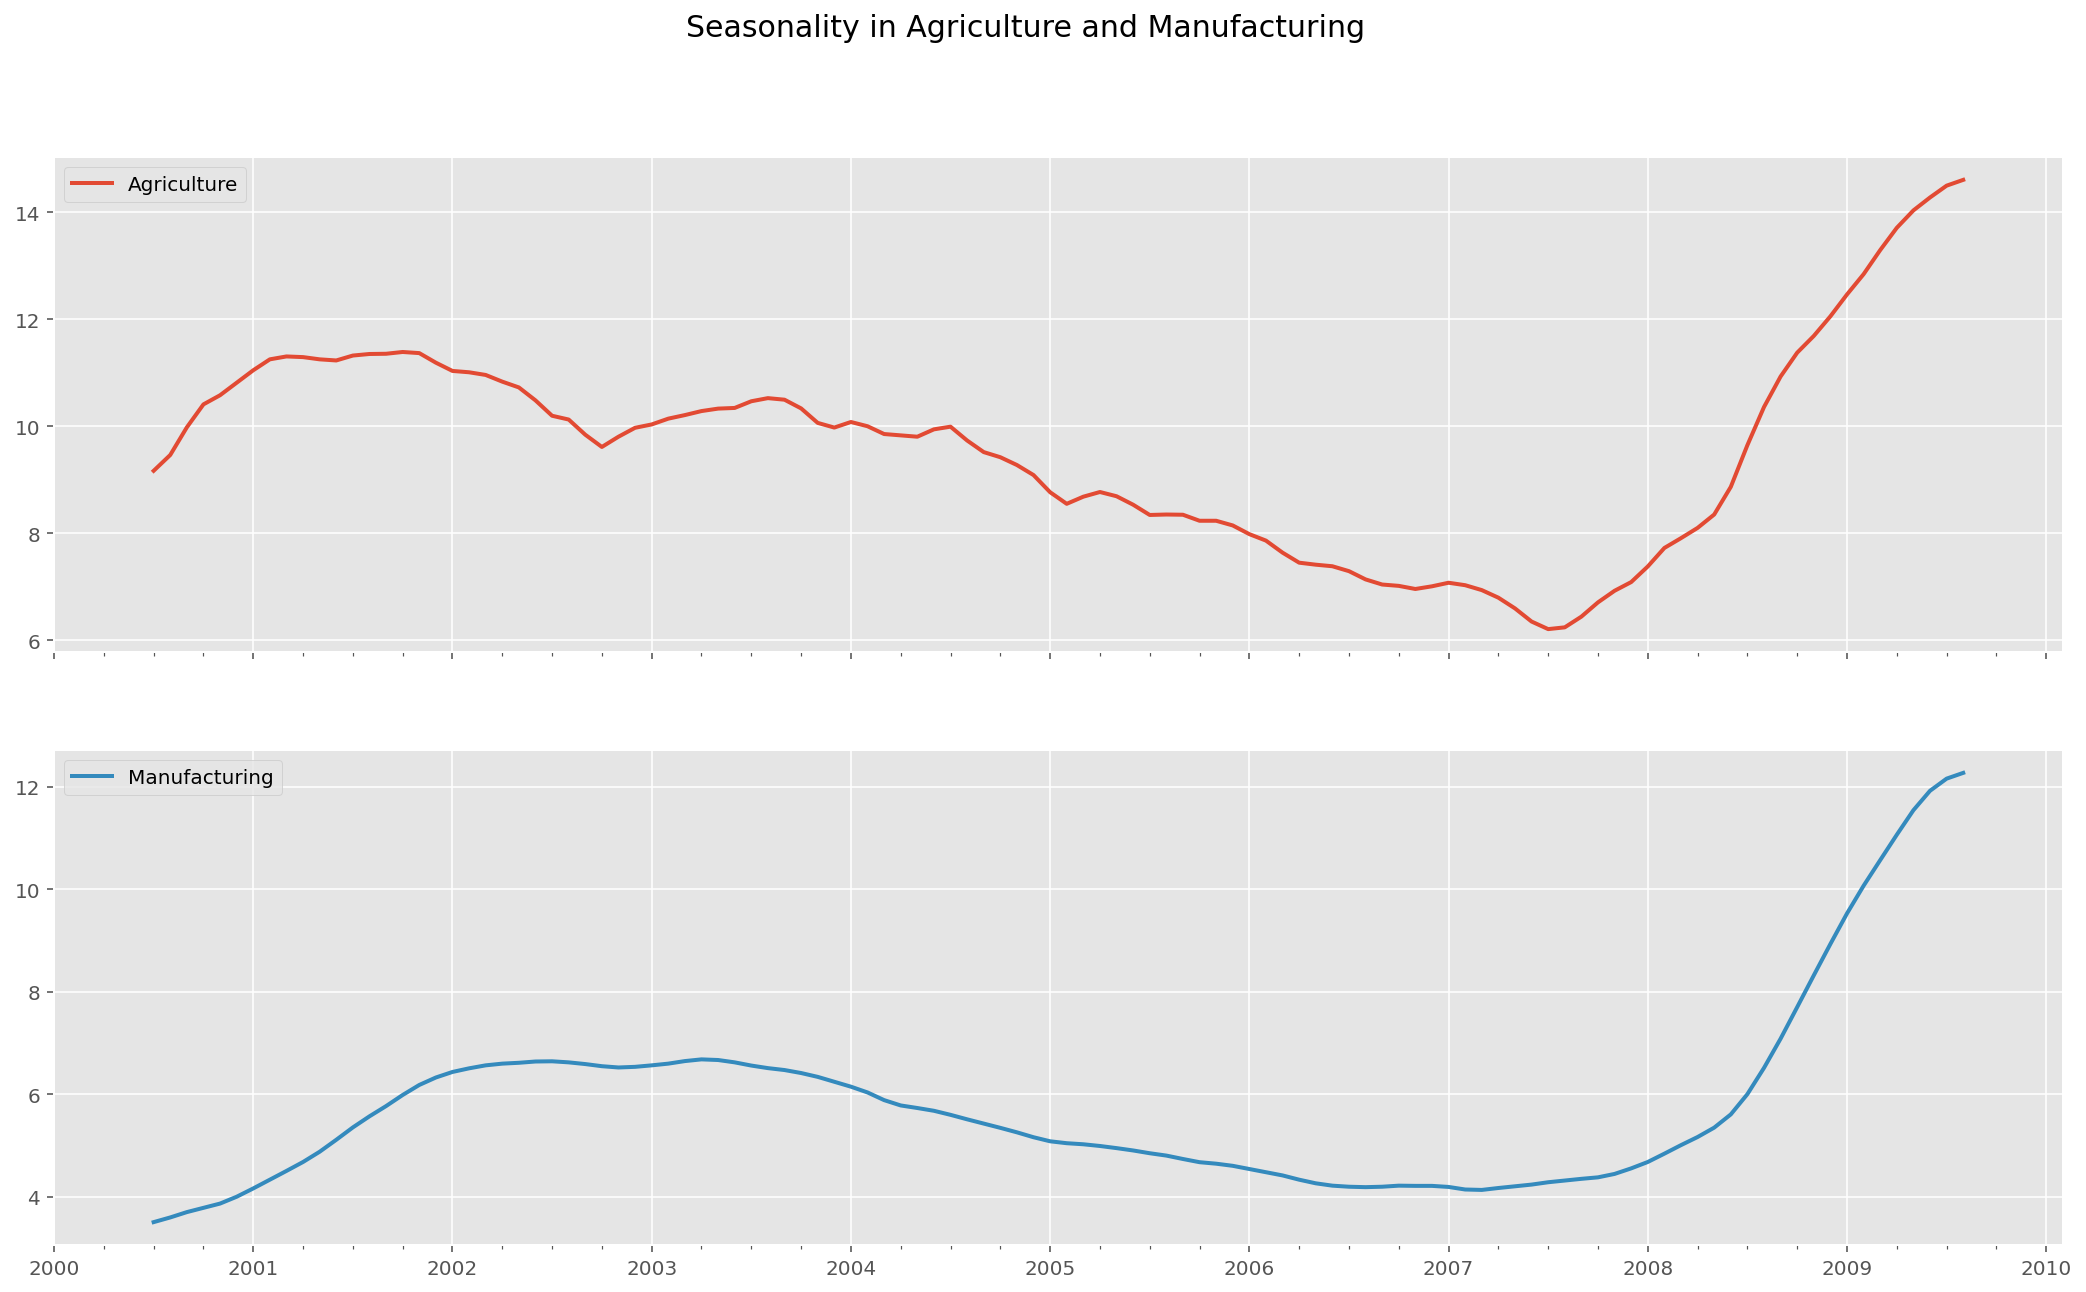

In [15]:
# Create a faceted plot of the seasonality_df DataFrame
trend_df[["Agriculture", "Manufacturing"]].plot(
    subplots=True,  # Show multiple plots
    layout=(2, 1),  # Choose layout for showing plots
    sharey=False,  # Share the y axis
    legend=True,  # Show legend
    fontsize=10,  # Set fontsize
    linewidth=2,  # Set widht of line
)

plt.suptitle("Seasonality in Agriculture and Manufacturing", size=15)
plt.show()


## 5. Visualize correlations with a clustermap
A clustermap uses hierarchical clusters to order data by similarity. This reorganizes the data for and displays similar content next to one another.

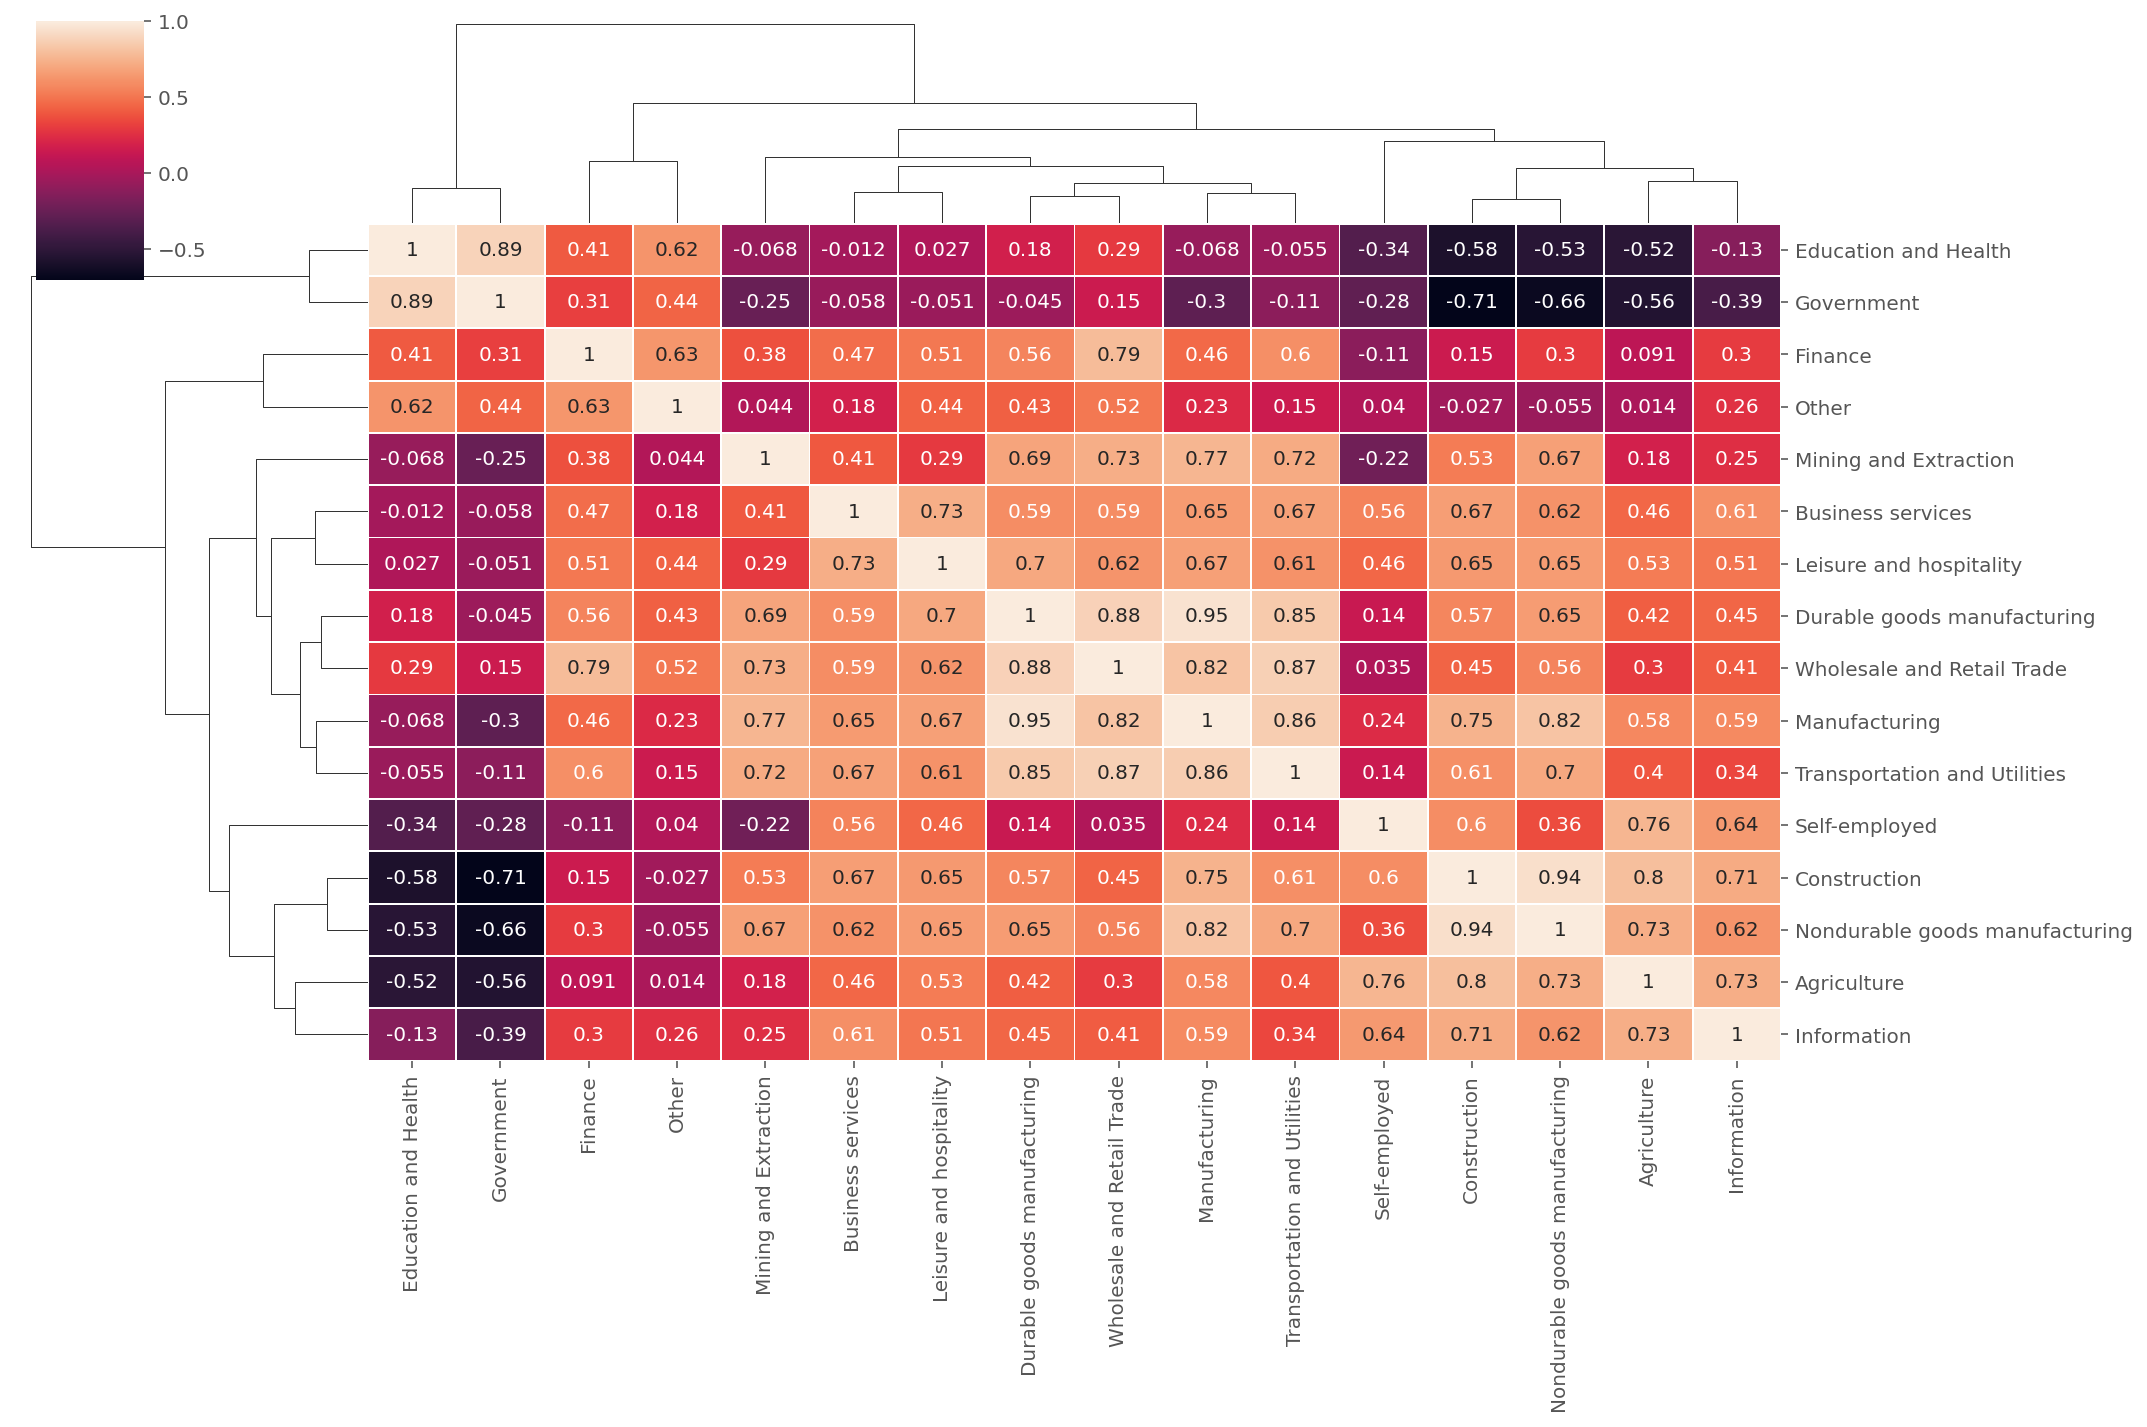

In [16]:
# Get correlation matrix of your chosen dataframe
seasonality_corr = seasonality_df.corr(
    method="spearman"
)  # Choose method to calculate correlation

# Customize the clustermap of the correlation matrix
fig = sns.clustermap(
    seasonality_corr,  # Choose correlation matrix to visualize
    annot=True,  # Show annotations
    annot_kws={"size": 10},  # Customize annotations
    linewidths=0.4,
    figsize=(15, 10),
)

plt.setp(
    fig.ax_heatmap.xaxis.get_majorticklabels(),
    rotation=90,  # Change rotation of x-labels
)
plt.show()
